Project setup

In [54]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

#Loading data
df = pd.read_csv('/content/Mobiles Dataset (2025).csv', encoding='latin1')

Initial analysis

In [55]:
print(f'Size of dataframe: {df.shape}')
print(f'First 5 records: ')
df.head()

print(f'Information about dataframe:')
df.info()

print(f'Number of missing values by column:')
df.isnull().sum()

Size of dataframe: (930, 15)
First 5 records: 
Information about dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Company Name               930 non-null    object
 1   Model Name                 930 non-null    object
 2   Mobile Weight              930 non-null    object
 3   RAM                        930 non-null    object
 4   Front Camera               930 non-null    object
 5   Back Camera                930 non-null    object
 6   Processor                  930 non-null    object
 7   Battery Capacity           930 non-null    object
 8   Screen Size                930 non-null    object
 9   Launched Price (Pakistan)  930 non-null    object
 10  Launched Price (India)     930 non-null    object
 11  Launched Price (China)     930 non-null    object
 12  Launched Price (USA)       930 non-null    o

,0
Company Name,0
Model Name,0
Mobile Weight,0
RAM,0
Front Camera,0
Back Camera,0
Processor,0
Battery Capacity,0
Screen Size,0
Launched Price (Pakistan),0


Transform object data to numeric

In [56]:
# Comprehensive function for cleaning all numeric columns
def clean_all_numeric_columns(df):
    """
    Cleans all numeric columns in the dataframe and creates new columns with transformed values.
    """
    df_cleaned = df.copy()

    # Cleaning RAM
    if 'RAM' in df.columns:
        df_cleaned['RAM_numeric'] = df['RAM'].apply(lambda x: clean_ram(x))

    # Cleaning cameras
    if 'Front Camera' in df.columns:
        df_cleaned['Front_Camera_numeric'] = df['Front Camera'].apply(lambda x: clean_camera(x))

    if 'Back Camera' in df.columns:
        df_cleaned['Back_Camera_numeric'] = df['Back Camera'].apply(lambda x: clean_camera(x))

    # Cleaning battery capacity
    if 'Battery Capacity' in df.columns:
        df_cleaned['Battery_numeric'] = df['Battery Capacity'].apply(lambda x: clean_battery(x))

    # Cleaning screen size
    if 'Screen Size' in df.columns:
        df_cleaned['Screen_Size_numeric'] = df['Screen Size'].apply(lambda x: clean_screen_size(x))

    # Cleaning phone weight
    if 'Mobile Weight' in df.columns:
        df_cleaned['Weight_numeric'] = df['Mobile Weight'].apply(lambda x: clean_weight(x))

    # Cleaning prices (USA)
    usa_price_column = 'Launched Price (USA)'
    if usa_price_column in df.columns:
        df_cleaned[usa_price_column + '_numeric'] = df[usa_price_column].apply(lambda x: clean_price(x))

    return df_cleaned

def clean_ram(ram_value):
    """
    Cleans RAM values and converts them to numbers (GB).
    For values with multiple options (e.g., "8GB / 12GB")
    takes the average value.
    """
    if pd.isna(ram_value):
        return np.nan

    ram_str = str(ram_value)

    # Find all numbers in the string
    numbers = re.findall(r'(\d+\.?\d*)', ram_str)

    if not numbers:
        return np.nan

    # If multiple numbers (e.g., "8GB / 12GB"), take the average
    if len(numbers) > 1:
        return sum(float(num) for num in numbers) / len(numbers)

    # Otherwise take the single number
    return float(numbers[0])

def clean_camera(camera_value):
    """
    Cleans camera resolution values and converts them to megapixels (MP).
    For cameras with multiple modules, sums the values.
    """
    if pd.isna(camera_value):
        return np.nan

    camera_str = str(camera_value).upper()

    # Handle "Dual" prefix
    if camera_str.startswith('DUAL'):
        # Find the first number after "Dual" and multiply by 2
        number = re.search(r'DUAL\s*(\d+\.?\d*)', camera_str)
        if number:
            return float(number.group(1)) * 2

    # Find all numbers in the string
    numbers = re.findall(r'(\d+\.?\d*)', camera_str)

    if not numbers:
        return np.nan

    # Sum all found values
    return sum(float(num) for num in numbers)

def clean_battery(battery_value):
    """
    Cleans battery capacity values and converts them to numbers (mAh).
    Removes commas and non-numeric characters.
    """
    if pd.isna(battery_value):
        return np.nan

    # Convert to string
    battery_str = str(battery_value)

    # Remove commas and units
    cleaned_str = re.sub(r'[^\d.]', '', battery_str.replace(',', ''))

    try:
        return float(cleaned_str)
    except:
        return np.nan

def clean_screen_size(screen_value):
    """
    Cleans screen size values and converts them to numbers (inches).
    For foldable phones, takes the size of the main (larger) screen.
    """
    if pd.isna(screen_value):
        return np.nan

    screen_str = str(screen_value)

    # Find all numeric values in the string
    numbers = re.findall(r'(\d+\.?\d*)', screen_str)

    if not numbers:
        return np.nan

    # If there are multiple sizes (foldable phone), take the largest
    if len(numbers) > 1:
        return max(float(num) for num in numbers)

    # Otherwise take the single number
    return float(numbers[0])

def clean_weight(weight_value):
    """
    Cleans phone weight values and converts them to numbers (grams).
    """
    if pd.isna(weight_value):
        return np.nan

    weight_str = str(weight_value)

    # Find the numeric value
    numeric_match = re.search(r'(\d+\.?\d*)', weight_str)

    if numeric_match:
        return float(numeric_match.group(1))
    else:
        return np.nan

def clean_price(price_str):
    """
    Cleans price values and converts them to numbers (USD).
    Removes 'USD' prefix, commas, and handles decimal points.
    """
    if pd.isna(price_str):
        return np.nan

    # Convert to string
    price_str = str(price_str)

    # Remove 'USD' prefix and extra spaces
    price_str = price_str.replace('USD', '').strip()

    # Replace commas with empty string (for thousands) or with dot (for decimal part)
    if ',' in price_str and '.' in price_str:
        # If there are both comma and dot (rare case), remove commas
        price_str = price_str.replace(',', '')
    elif ',' in price_str:
        # If there's only comma, check if it's thousands separator or decimal separator
        parts = price_str.split(',')
        if len(parts) == 2 and len(parts[1]) == 2:  # Likely a decimal separator (e.g., "396,22")
            price_str = price_str.replace(',', '.')
        else:  # It's a thousands separator
            price_str = price_str.replace(',', '')

    # Remove any remaining non-numeric characters
    price_str = re.sub(r'[^\d.]', '', price_str)

    try:
        return float(price_str)
    except:
        return np.nan

# Apply the cleaning function to the entire dataframe
df_cleaned = clean_all_numeric_columns(df)

# List of all transformed numeric columns
numeric_columns = [
    'RAM_numeric',
    'Front_Camera_numeric',
    'Back_Camera_numeric',
    'Battery_numeric',
    'Screen_Size_numeric',
    'Weight_numeric',
    'Launched Price (USA)_numeric',
]

# Check for each column's presence and remove absent ones
numeric_columns = [col for col in numeric_columns if col in df_cleaned.columns]

# Display statistics for cleaned columns
print("Statistics for cleaned columns:")
for col in numeric_columns:
    non_null = df_cleaned[col].count()
    total = len(df_cleaned)
    print(f"{col}: {non_null} non-null values out of {total} ({non_null/total*100:.2f}%)")

# Display basic statistics
print("\nBasic statistics:")
df_cleaned[numeric_columns].describe()

Statistics for cleaned columns:
RAM_numeric: 930 non-null values out of 930 (100.00%)
Front_Camera_numeric: 930 non-null values out of 930 (100.00%)
Back_Camera_numeric: 930 non-null values out of 930 (100.00%)
Battery_numeric: 930 non-null values out of 930 (100.00%)
Screen_Size_numeric: 930 non-null values out of 930 (100.00%)
Weight_numeric: 930 non-null values out of 930 (100.00%)
Launched Price (USA)_numeric: 930 non-null values out of 930 (100.00%)

Basic statistics:


,RAM_numeric,Front_Camera_numeric,Back_Camera_numeric,Battery_numeric,Screen_Size_numeric,Weight_numeric,Launched Price (USA)_numeric
count,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000
mean,7.789247,18.515699,55.493978,5026.163441,7.083796,228.267097,583.337505
std,3.181315,12.552687,36.814202,1355.548264,1.533690,105.432503,421.007977
min,1.000000,2.000000,5.000000,2000.000000,5.000000,135.000000,79.000000
25%,6.000000,8.000000,25.000000,4402.500000,6.500000,185.000000,250.000000
50%,8.000000,16.000000,50.000000,5000.000000,6.670000,194.000000,449.000000
75%,8.000000,32.000000,64.000000,5091.250000,6.780000,208.000000,849.000000
max,16.000000,120.000000,212.000000,11200.000000,14.600000,732.000000,2799.000000


Distribution analysis of the target variable

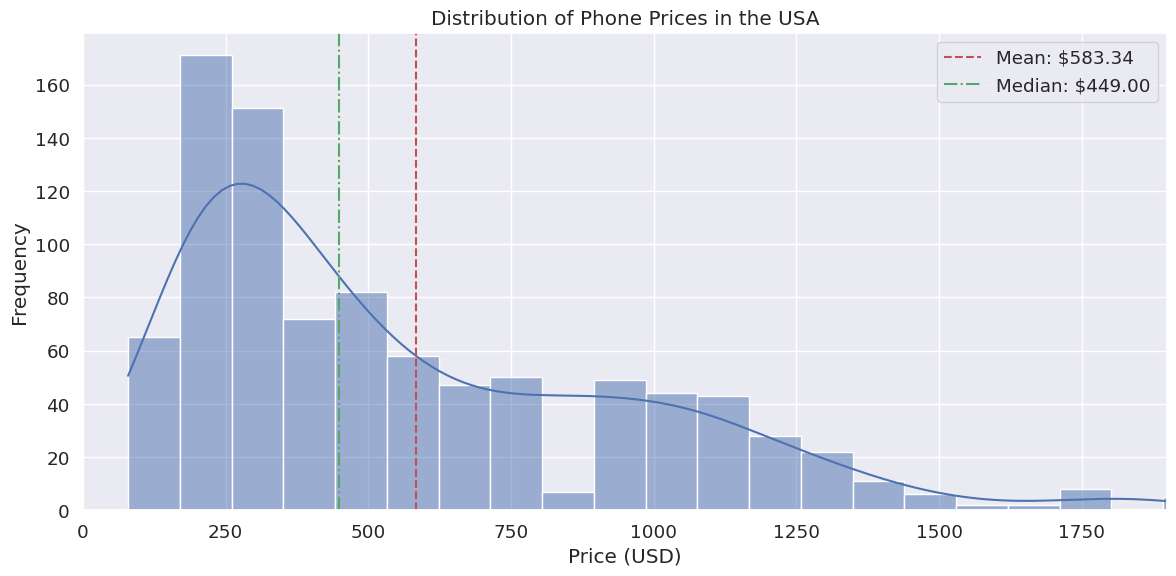

In [57]:
# Set style for visualization
sns.set_style("whitegrid")
sns.set(font_scale=1.2)

# Create a figure for displaying USA price distribution
fig, ax = plt.subplots(figsize=(12, 6))

# Use the correct column name from the cleaned DataFrame
usa_price_column = 'Launched Price (USA)_numeric'

# Check for column presence
if usa_price_column not in df_cleaned.columns:
    print(f"Column {usa_price_column} not found. Available columns:")
    print(df_cleaned.columns.tolist())
else:
    # Define upper bound for display (99th percentile to eliminate extreme outliers)
    max_x = df_cleaned[usa_price_column].quantile(0.99)

    # Draw histogram
    sns.histplot(df_cleaned[usa_price_column].dropna(), ax=ax, kde=True, bins=30)
    ax.set_xlim(0, max_x)

    # Improve labels and title
    ax.set_title(f'Distribution of Phone Prices in the USA')
    ax.set_xlabel('Price (USD)')
    ax.set_ylabel('Frequency')

    # Add vertical lines for mean and median
    ax.axvline(df_cleaned[usa_price_column].mean(), color='r', linestyle='--',
               label=f'Mean: ${df_cleaned[usa_price_column].mean():.2f}')
    ax.axvline(df_cleaned[usa_price_column].median(), color='g', linestyle='-.',
               label=f'Median: ${df_cleaned[usa_price_column].median():.2f}')
    ax.legend()

    plt.tight_layout()
    plt.show()

Box plot for detecting outliers

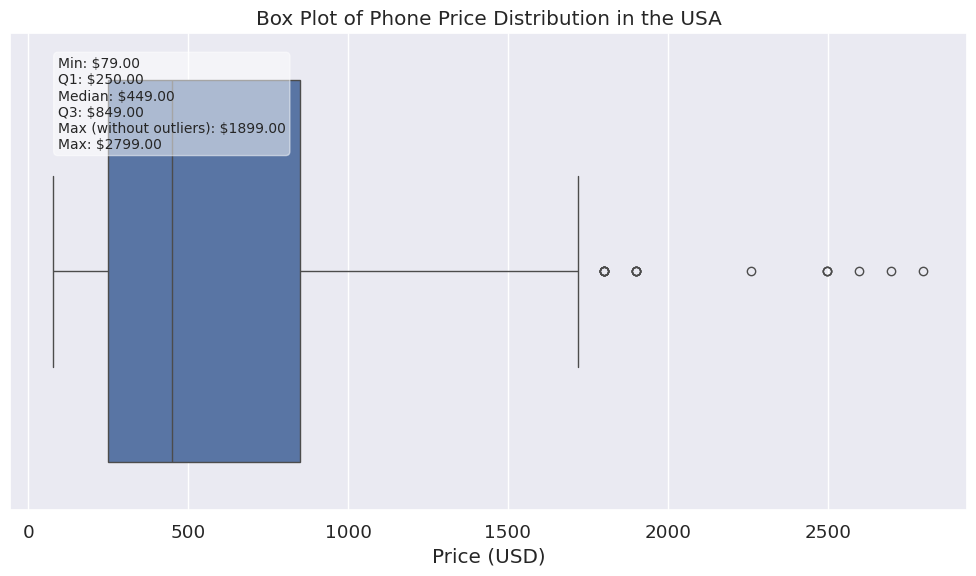

In [58]:
# Set style for visualization
sns.set_style("whitegrid")
sns.set(font_scale=1.2)

# Create a figure for box plot of USA price distribution
fig, ax = plt.subplots(figsize=(10, 6))

# Get the USA price column name
usa_price_column = 'Launched Price (USA)_numeric'

# Create box plot
sns.boxplot(x=df_cleaned[usa_price_column].dropna(), ax=ax)

# Improve title and labels
ax.set_title('Box Plot of Phone Price Distribution in the USA')
ax.set_xlabel('Price (USD)')

# Add annotations with key statistics
stats = df_cleaned[usa_price_column].describe()
textstr = '\n'.join((
    f'Min: ${stats["min"]:.2f}',
    f'Q1: ${stats["25%"]:.2f}',
    f'Median: ${stats["50%"]:.2f}',
    f'Q3: ${stats["75%"]:.2f}',
    f'Max (without outliers): ${df_cleaned[usa_price_column].quantile(0.99):.2f}',
    f'Max: ${stats["max"]:.2f}'
))

# Place text information on the plot
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=props)

plt.tight_layout()
plt.show()

Log-transformed price

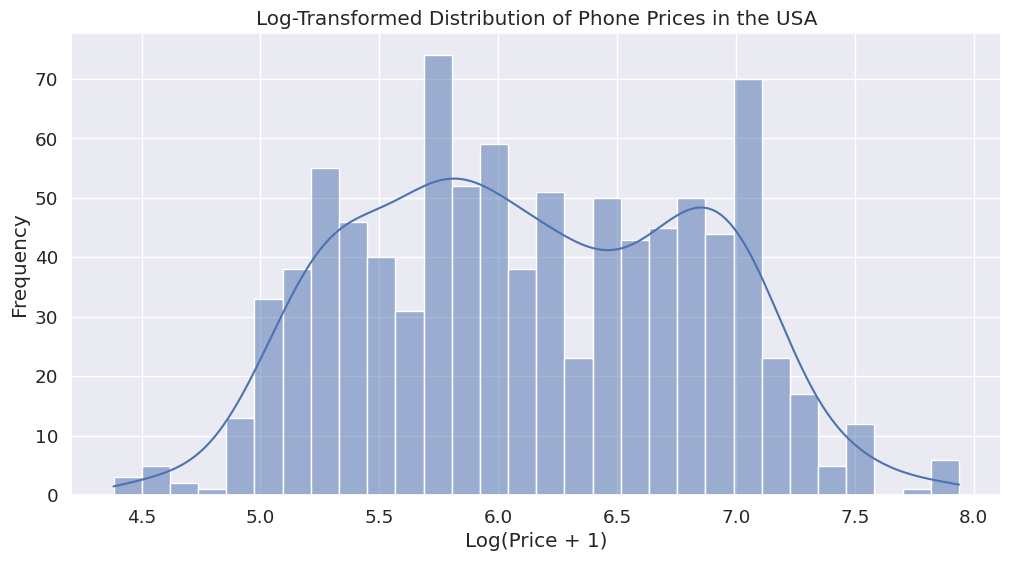

    Company Name          Model Name  Launched Price (USA)_numeric  \
661       Huawei       Mate XT 512GB                        2799.0   
630       Huawei             Mate X2                        2699.0   
660       Huawei       Mate XT 256GB                        2599.0   
643       Huawei             Mate X3                        2499.0   
634       Huawei           Mate Xs 2                        2499.0   
657       Huawei             Mate X6                        2499.0   
929      Samsung  Galaxy Z Fold6 1TB                        2259.0   

     Launched Year  
661           2024  
630           2021  
660           2024  
643           2023  
634           2022  
657           2024  
929           2024  


In [59]:
df_cleaned['Log_price'] = np.log1p(df_cleaned['Launched Price (USA)_numeric'])

# Visualize log-transformed distribution
plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned['Log_price'].dropna(), bins=30, kde=True)
plt.title('Log-Transformed Distribution of Phone Prices in the USA')
plt.xlabel('Log(Price + 1)')
plt.ylabel('Frequency')
plt.show()

# Create a column that indicates outliers
threshold = df_cleaned['Launched Price (USA)_numeric'].quantile(0.99) # 99th percentile
df_cleaned['is_outlier'] = df_cleaned['Launched Price (USA)_numeric'] > threshold

# Look at outliers - what phones are these?
outliers = df_cleaned[df_cleaned['is_outlier']].sort_values(by='Launched Price (USA)_numeric', ascending=False)
print(outliers[['Company Name', 'Model Name', 'Launched Price (USA)_numeric', 'Launched Year']].head(10))

In [60]:
# Remove only the Nokia T21 phone with anomalous price
df_cleaned = df_cleaned[df_cleaned['Launched Price (USA)_numeric'] != 39622.0].copy()

max_price = df_cleaned['Launched Price (USA)_numeric'].max()
print(f"Maximum price in the dataset (after removing outlier): ${max_price:.2f}")

Maximum price in the dataset (after removing outlier): $2799.00


In [61]:
# Get a list of all columns with "_numeric" suffix
numeric_columns = [col for col in df_cleaned.columns if col.endswith('_numeric')]

# Create a list of columns to keep
# This includes columns with "_numeric" and other columns you want to preserve
columns_to_keep = numeric_columns + ['Company Name', 'Model Name', 'Processor', 'Launched Year']

# Create a new dataframe with only the needed columns
df_numeric = df_cleaned[columns_to_keep].copy()

# Check the result
print(f"Original number of columns: {df_cleaned.shape[1]}")
print(f"Number of columns after filtering: {df_numeric.shape[1]}")
print(f"Columns in the new dataframe:\n{df_numeric.columns.tolist()}")

Original number of columns: 24
Number of columns after filtering: 11
Columns in the new dataframe:
['RAM_numeric', 'Front_Camera_numeric', 'Back_Camera_numeric', 'Battery_numeric', 'Screen_Size_numeric', 'Weight_numeric', 'Launched Price (USA)_numeric', 'Company Name', 'Model Name', 'Processor', 'Launched Year']


Encoding categorical variables

In [62]:
# Encoding categorical variables
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# One-hot encoding for manufacturers
encoder = OneHotEncoder(sparse_output=False, drop='first')
company_encoded = encoder.fit_transform(df_numeric[['Company Name']])
company_encoded_df = pd.DataFrame(
    company_encoded,
    columns=[f'company_{cat}' for cat in encoder.categories_[0][1:]]
)

# Label encoding for processor
label_encoder = LabelEncoder()
df_numeric['processor_encoded'] = label_encoder.fit_transform(df_numeric['Processor'])

# Combining encoded features with the original dataset
df_encoded = pd.concat([df_numeric, company_encoded_df], axis=1)

Correlation analysis

In [63]:
# Select only numeric columns for correlation analysis
numeric_columns = df_encoded.select_dtypes(include=['int64', 'float64']).columns
numeric_data = df_encoded[numeric_columns]

# Calculate correlation matrix using Pearson method
usa_price_column = 'Launched Price (USA)_numeric'
correlation_with_usa_price = numeric_data.corr()[usa_price_column].sort_values(ascending=False)

# Sort correlations with USA price in descending order
print("Correlations with USA price:")
print(correlation_with_usa_price)

Correlations with USA price:
Launched Price (USA)_numeric    1.000000
RAM_numeric                     0.468555
company_Huawei                  0.275600
Back_Camera_numeric             0.237688
company_Sony                    0.128974
company_Samsung                 0.126841
Weight_numeric                  0.109681
Front_Camera_numeric            0.092892
Screen_Size_numeric             0.089902
company_Google                  0.062077
Launched Year                   0.053495
company_Honor                   0.018967
company_OnePlus                 0.014772
company_Xiaomi                 -0.009641
company_iQOO                   -0.024922
Battery_numeric                -0.030196
company_Poco                   -0.032363
company_Tecno                  -0.055574
company_Oppo                   -0.074446
company_Lenovo                 -0.082665
company_Vivo                   -0.086385
company_Motorola               -0.095324
company_Nokia                  -0.101177
processor_encoded           

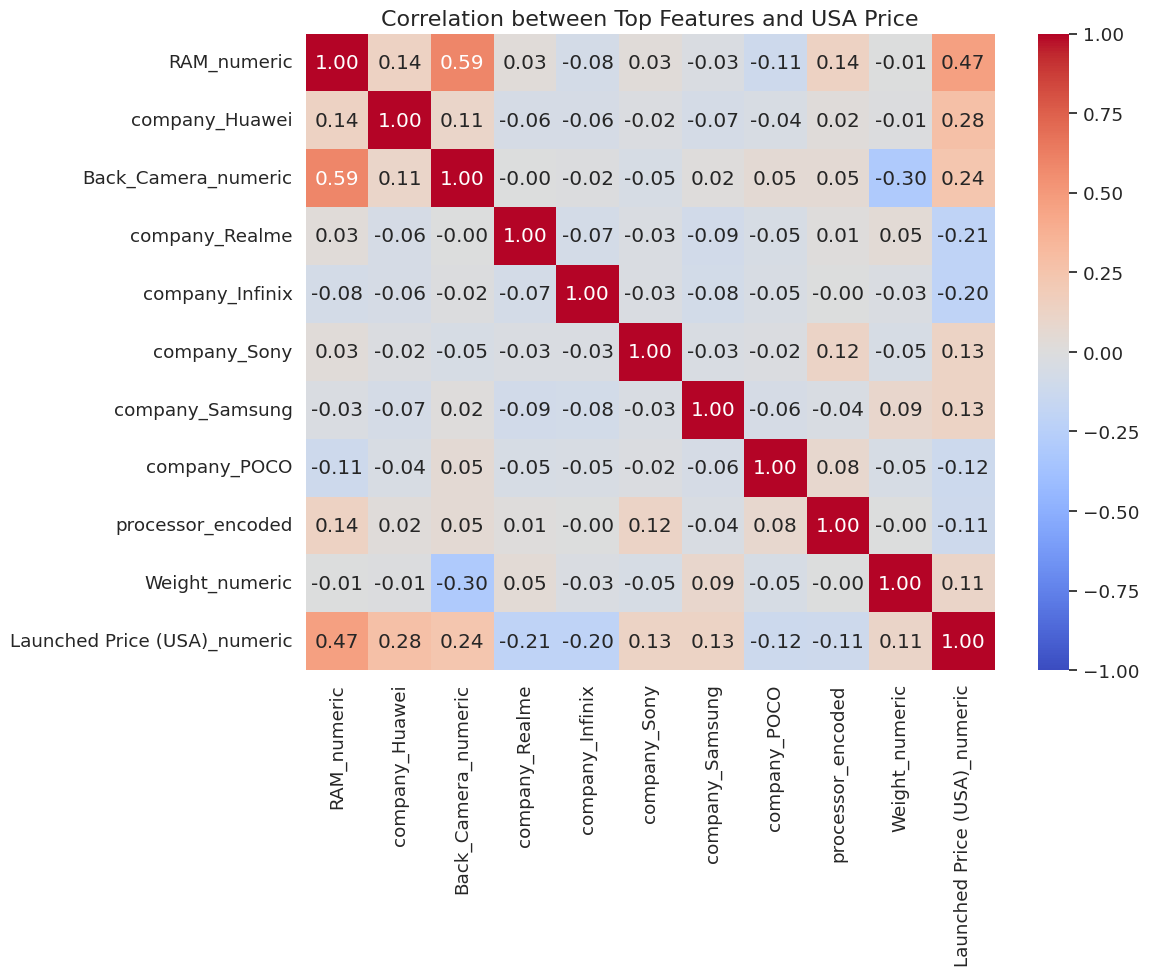

In [64]:
# Select top 10 features with highest correlation (by absolute value)
top_correlated_features = correlation_with_usa_price.drop(usa_price_column).abs().nlargest(10).index
top_correlated_features = list(top_correlated_features) + [usa_price_column]

# Create correlation matrix only for top features and USA price
top_corr_matrix = df_encoded[top_correlated_features].corr()

# Visualize heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(top_corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation between Top Features and USA Price', fontsize=16)
plt.tight_layout()
plt.show()

Splitting data into training and test sets

Training set size: (744, 22)
Test set size: (186, 22)

Training set statistics:
Mean price: $582.52
Median price: $449.00
Minimum price: $79.00
Maximum price: $2799.00

Test set statistics:
Mean price: $586.62
Median price: $429.00
Minimum price: $99.00
Maximum price: $1899.00


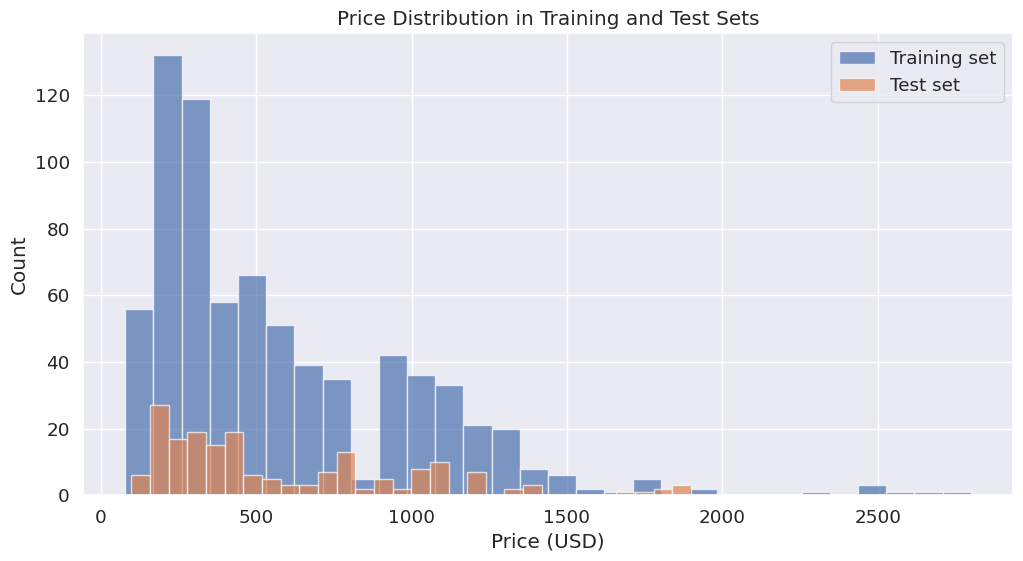

In [65]:
# Import necessary tools
from sklearn.model_selection import train_test_split

# Define feature matrix X and target variable vector y
# Based on previous correlation analysis, select the most important features
# Important: exclude 'Model Name', as it's a unique identifier that could cause overfitting

# List of numeric features to use
numeric_features = [
    'RAM_numeric',
    'Back_Camera_numeric',
    'Weight_numeric',
    'processor_encoded'
]

# Add encoded manufacturer features that have significant correlation
company_features = [col for col in df_encoded.columns if col.startswith('company_')]

# Combine all features
features = numeric_features + company_features

# Check for the presence of all needed features
missing_features = [feature for feature in features if feature not in df_encoded.columns]
if missing_features:
    print(f"Warning! Some features are missing from the dataframe: {missing_features}")
    # Remove missing features from the list
    features = [feature for feature in features if feature in df_encoded.columns]
    print(f"Using available features: {features}")

# Create feature matrix X and target variable vector y
# Using df_encoded instead of df_model which was not defined
X = df_encoded[features]
y = df_encoded['Launched Price (USA)_numeric']

# Split data into training and test sets
# Use 80% for training and 20% for testing
# Set random_state for reproducibility of results
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Display sizes of resulting datasets
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

# Display basic statistics for training and test sets
print("\nTraining set statistics:")
print(f"Mean price: ${y_train.mean():.2f}")
print(f"Median price: ${y_train.median():.2f}")
print(f"Minimum price: ${y_train.min():.2f}")
print(f"Maximum price: ${y_train.max():.2f}")

print("\nTest set statistics:")
print(f"Mean price: ${y_test.mean():.2f}")
print(f"Median price: ${y_test.median():.2f}")
print(f"Minimum price: ${y_test.min():.2f}")
print(f"Maximum price: ${y_test.max():.2f}")

# Check feature distribution between training and test sets
# This helps ensure that the split was balanced
# Visualize price distribution in training and test sets
plt.figure(figsize=(12, 6))
plt.hist(y_train, bins=30, alpha=0.7, label='Training set')
plt.hist(y_test, bins=30, alpha=0.7, label='Test set')
plt.xlabel('Price (USD)')
plt.ylabel('Count')
plt.title('Price Distribution in Training and Test Sets')
plt.legend()
plt.show()

Building basic regression models

Linear Regression:
  RMSE (test): $252.75
  MAE (test): $180.39
  R² (test): 0.6309
  Training time: 0.00 sec

Ridge Regression:
  RMSE (test): $267.85
  MAE (test): $190.92
  R² (test): 0.5855
  Training time: 0.01 sec

Lasso Regression:
  RMSE (test): $253.88
  MAE (test): $180.72
  R² (test): 0.6276
  Training time: 0.01 sec

Decision Tree:
  RMSE (test): $161.16
  MAE (test): $98.05
  R² (test): 0.8499
  Training time: 0.01 sec

Random Forest:
  RMSE (test): $134.94
  MAE (test): $88.08
  R² (test): 0.8948
  Training time: 0.44 sec

Gradient Boosting:
  RMSE (test): $159.82
  MAE (test): $109.46
  R² (test): 0.8524
  Training time: 0.15 sec

Model comparison by accuracy (sorted by test RMSE):
               Model  RMSE (test)  MAE (test)  R² (test)  Training time (sec)
4      Random Forest   134.939400   88.083163   0.894805             0.444585
5  Gradient Boosting   159.818507  109.458869   0.852439             0.148992
3      Decision Tree   161.162750   98.053817   0.849946    

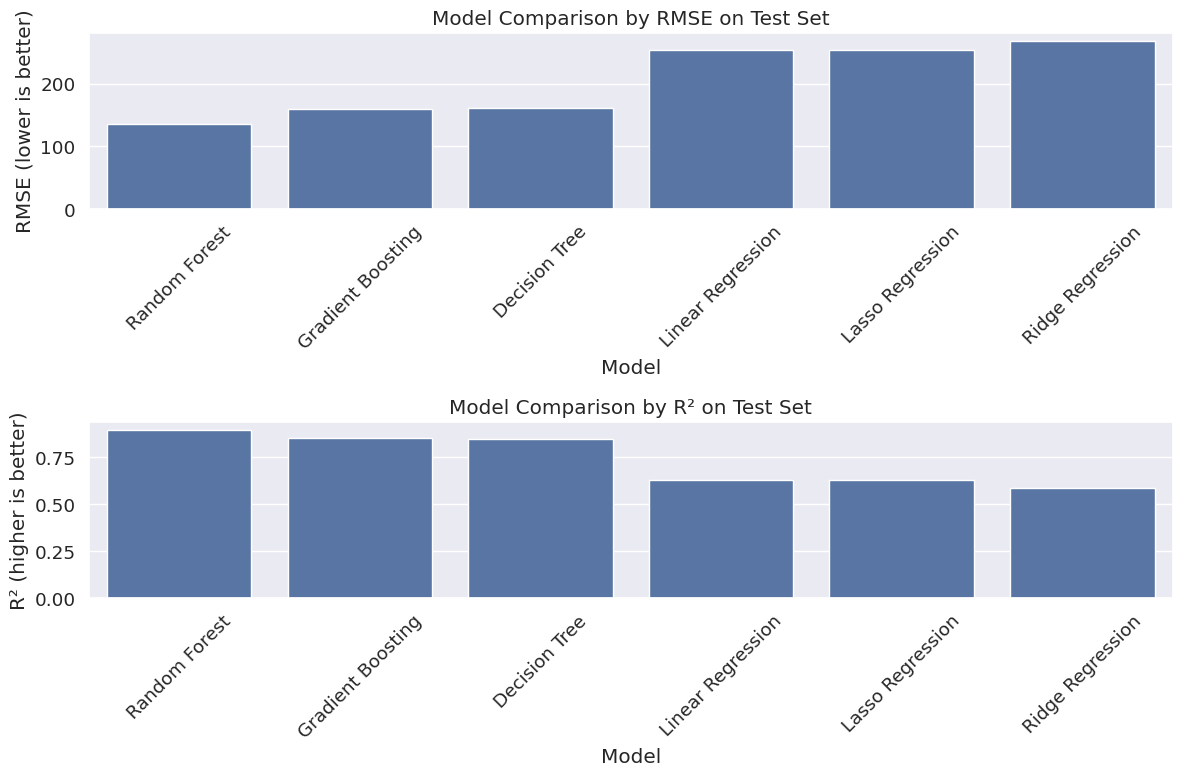

In [66]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import time

# Create a function for model evaluation
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name=None):
    # Record training start time
    start_time = time.time()

    # Train the model
    model.fit(X_train, y_train)

    # Calculate training time
    train_time = time.time() - start_time

    # Make predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Calculate metrics
    # For training set
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    train_mae = mean_absolute_error(y_train, y_pred_train)
    train_r2 = r2_score(y_train, y_pred_train)

    # For test set
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    test_mae = mean_absolute_error(y_test, y_pred_test)
    test_r2 = r2_score(y_test, y_pred_test)

    # Return result
    return {
        'Model': model_name if model_name else model.__class__.__name__,
        'Training time (sec)': train_time,
        'RMSE (train)': train_rmse,
        'MAE (train)': train_mae,
        'R² (train)': train_r2,
        'RMSE (test)': test_rmse,
        'MAE (test)': test_mae,
        'R² (test)': test_r2
    }

# Create a list of models for comparison
models = [
    ('Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge(alpha=1.0)),
    ('Lasso Regression', Lasso(alpha=0.1)),
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('Random Forest', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('Gradient Boosting', GradientBoostingRegressor(n_estimators=100, random_state=42))
]

# Evaluate each model and save results
results = []
for name, model in models:
    result = evaluate_model(model, X_train, X_test, y_train, y_test, name)
    results.append(result)
    print(f"{result['Model']}:")
    print(f"  RMSE (test): ${result['RMSE (test)']:.2f}")
    print(f"  MAE (test): ${result['MAE (test)']:.2f}")
    print(f"  R² (test): {result['R² (test)']:.4f}")
    print(f"  Training time: {result['Training time (sec)']:.2f} sec\n")

# Convert results to DataFrame for better display
results_df = pd.DataFrame(results)

# Sort by test RMSE (from best to worst)
results_df = results_df.sort_values('RMSE (test)')

# Display comparison table
print("Model comparison by accuracy (sorted by test RMSE):")
print(results_df[['Model', 'RMSE (test)', 'MAE (test)', 'R² (test)', 'Training time (sec)']])

# Visualize model results
plt.figure(figsize=(12, 8))

# Create RMSE comparison chart
plt.subplot(2, 1, 1)
sns.barplot(x='Model', y='RMSE (test)', data=results_df)
plt.title('Model Comparison by RMSE on Test Set')
plt.xticks(rotation=45)
plt.ylabel('RMSE (lower is better)')

# Create R² comparison chart
plt.subplot(2, 1, 2)
sns.barplot(x='Model', y='R² (test)', data=results_df)
plt.title('Model Comparison by R² on Test Set')
plt.xticks(rotation=45)
plt.ylabel('R² (higher is better)')

plt.tight_layout()
plt.show()

Feature importance analysis for Random Forest

Feature importance for Random Forest model:
                Feature  Importance
2        Weight_numeric    0.309684
3     processor_encoded    0.258543
0           RAM_numeric    0.222132
1   Back_Camera_numeric    0.096640
6        company_Huawei    0.035071
16      company_Samsung    0.020865
17         company_Sony    0.011021
5         company_Honor    0.008376
15       company_Realme    0.006584
4        company_Google    0.004723
18        company_Tecno    0.004621
9      company_Motorola    0.004293
7       company_Infinix    0.003384
19         company_Vivo    0.003205
12         company_Oppo    0.002960
11      company_OnePlus    0.002299
20       company_Xiaomi    0.002174
13         company_POCO    0.001856
8        company_Lenovo    0.001361
10        company_Nokia    0.000093
21         company_iQOO    0.000065
14         company_Poco    0.000051


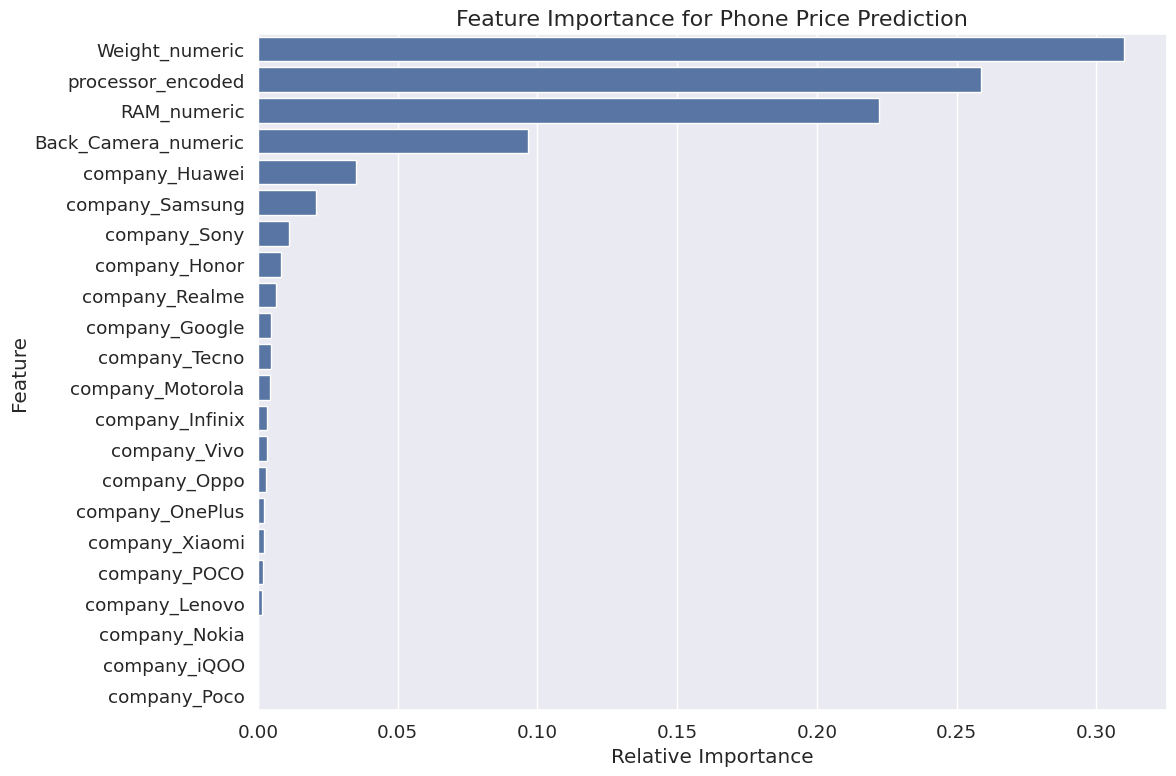

In [67]:
# Random Forest model, which gave the best results
best_model = RandomForestRegressor(n_estimators=100, random_state=42)
best_model.fit(X_train, y_train)

# Get feature importance
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_model.feature_importances_
})

# Sort by importance value (from most to least important)
feature_importance = feature_importance.sort_values('Importance', ascending=False)

# Display feature importance table
print("Feature importance for Random Forest model:")
print(feature_importance)

# Visualize feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance for Phone Price Prediction', fontsize=16)
plt.xlabel('Relative Importance')
plt.tight_layout()
plt.show()

Hyperparameter optimization for Random Forest

Starting optimal hyperparameter search...
Fitting 5 folds for each of 36 candidates, totalling 180 fits

Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best MSE value (cross-validation): 24753.45

Optimized model metrics on test set:
RMSE: $138.09
MAE: $89.71
R²: 0.8898

Comparison with baseline Random Forest model:
RMSE improvement: $-3.15 (was: $134.94, now: $138.09)
MAE improvement: $-1.63 (was: $88.08, now: $89.71)
R² improvement: -0.0050 (was: 0.8948, now: 0.8898)


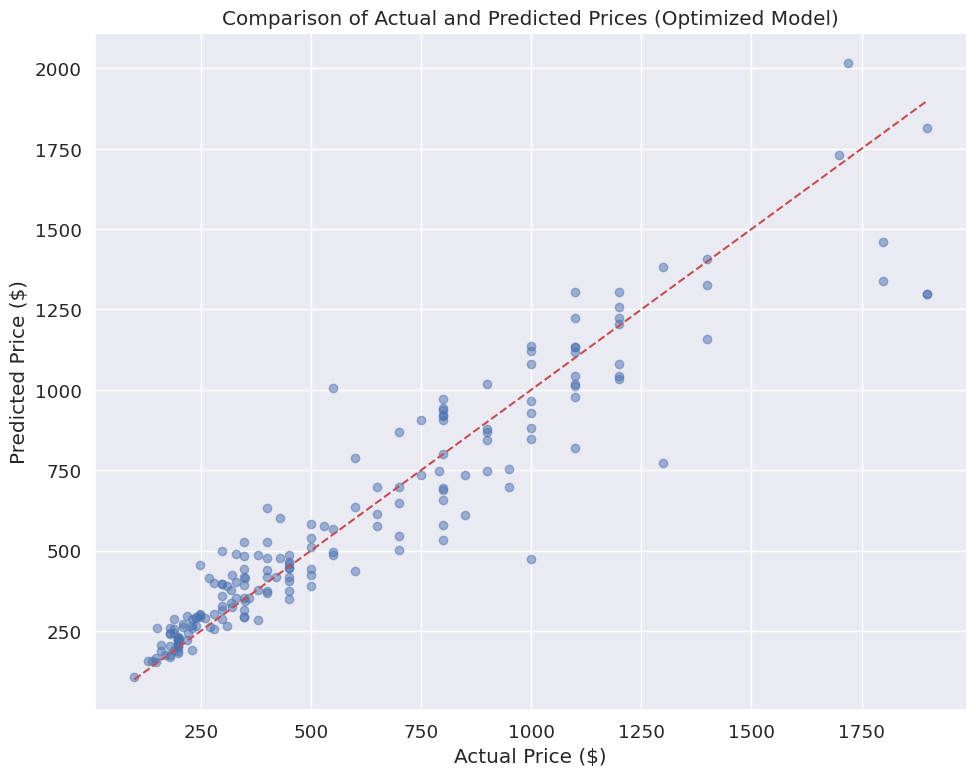

In [68]:
from sklearn.model_selection import GridSearchCV

# Define simplified hyperparameter grid for faster search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Create model for optimal hyperparameter search
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

# Start optimal hyperparameter search
print("Starting optimal hyperparameter search...")
grid_search.fit(X_train, y_train)

# Display best parameters and result
print("\nBest hyperparameters:", grid_search.best_params_)
print(f"Best MSE value (cross-validation): {-grid_search.best_score_:.2f}")

# Use model with optimal hyperparameters
best_rf = grid_search.best_estimator_

# Evaluate optimized model on test set
y_pred = best_rf.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
test_mae = mean_absolute_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

print(f"\nOptimized model metrics on test set:")
print(f"RMSE: ${test_rmse:.2f}")
print(f"MAE: ${test_mae:.2f}")
print(f"R²: {test_r2:.4f}")

# Compare with baseline Random Forest model
print("\nComparison with baseline Random Forest model:")
print(f"RMSE improvement: ${134.94 - test_rmse:.2f} (was: $134.94, now: ${test_rmse:.2f})")
print(f"MAE improvement: ${88.08 - test_mae:.2f} (was: $88.08, now: ${test_mae:.2f})")
print(f"R² improvement: {test_r2 - 0.8948:.4f} (was: 0.8948, now: {test_r2:.4f})")

# Visualize comparison of actual and predicted prices
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')
plt.title('Comparison of Actual and Predicted Prices (Optimized Model)')
plt.tight_layout()
plt.show()